In [61]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

CUTOFF = 0.4

In [62]:
aggregated_data = pd.read_csv("aggregated_data.csv")
aggregated_data.head()

,Unnamed: 0,Player,Season,AS,Age,Pos,Tm,G,GS,MP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,A.J. Green,2023,0,23,SG,30,30,0,9.7,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,3,A.J. Price,2010,0,23,PG,56,56,2,15.4,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,4,A.J. Price,2011,0,24,PG,50,50,0,15.9,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,5,A.J. Price,2012,0,25,PG,44,44,1,12.9,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9


In [63]:
data = aggregated_data.drop(columns=['Unnamed: 0'])
data.head()

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,30,30,0,9.7,1.6,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,0.8,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
2,A.J. Price,2010,0,23,PG,56,56,2,15.4,2.6,...,0.800,0.2,1.4,1.6,1.9,0.6,0.1,1.1,0.9,7.3
3,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.3,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
4,A.J. Price,2012,0,25,PG,44,44,1,12.9,1.3,...,0.800,0.3,1.1,1.4,2.0,0.5,0.0,0.7,0.7,3.9


In [64]:
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [65]:
# data = data.rename(columns={"3P": "three_P", "3PA": "three_PA", "3PP": "three_PP", "2P": "two_P", "2PA": "two_PA", "2PP": "two_PP"})
data.columns

Index(['Player', 'Season', 'AS', 'Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FGP', 'three_P', 'three_PA', 'three_PP', 'two_P', 'two_PA',
       'two_PP', 'eFGP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [66]:
data.groupby(by="Season").sum()["AS"]

Season
2009    26
2010    28
2011    23
2012    25
2013    24
2014    25
2015    28
2016    26
2017    25
2018    28
2019    27
2020    24
2021    27
2022    27
2023    25
Name: AS, dtype: int64

In [67]:
train_data = data[data["Season"] % 3 == 1]
train_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,30,30,0,9.7,1.6,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,A.J. Hammons,2017,0,24,C,22,22,0,7.4,0.8,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,A.J. Price,2011,0,24,PG,50,50,0,15.9,2.3,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,A.J. Price,2014,0,27,SG,28,28,0,3.5,0.7,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,AJ Griffin,2023,0,19,SF,59,59,11,19.8,3.5,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,Zhaire Smith,2020,0,20,SF,7,7,0,4.6,0.4,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1
6292,Ziaire Williams,2023,0,21,SF,32,32,3,15.7,2.1,...,0.765,0.4,1.8,2.2,0.8,0.4,0.2,0.9,1.7,5.2
6293,Zion Williamson,2020,0,19,PF,24,24,24,27.8,8.8,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6295,Zion Williamson,2023,1,22,PF,29,29,29,33.0,9.8,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0


In [68]:
test_data = data[data["Season"] % 3 != 1]
test_data

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,A.J. Price,2010,0,23,PG,56,56,2,15.4,2.6000,...,0.800000,0.2,1.4,1.6,1.9000,0.6000,0.1,1.10000,0.90000,7.300
4,A.J. Price,2012,0,25,PG,44,44,1,12.9,1.3000,...,0.800000,0.3,1.1,1.4,2.0000,0.5000,0.0,0.70000,0.70000,3.900
5,A.J. Price,2013,0,26,PG,57,57,22,22.4,2.8000,...,0.790000,0.4,1.6,2.0,3.6000,0.6000,0.1,1.10000,1.30000,7.700
8,Aaron Brooks,2009,0,24,PG,80,80,35,25.0,4.0000,...,0.866000,0.4,1.6,2.0,3.0000,0.6000,0.1,1.60000,1.90000,11.200
9,Aaron Brooks,2010,0,25,PG,82,82,82,35.6,7.0000,...,0.822000,0.7,2.0,2.6,5.3000,0.8000,0.2,2.80000,2.40000,19.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,Ziaire Williams,2022,0,20,SF,62,62,31,21.7,3.1000,...,0.782000,0.4,1.7,2.1,1.0000,0.6000,0.2,0.70000,1.80000,8.100
6294,Zion Williamson,2021,1,20,PF,61,61,61,33.2,10.4000,...,0.698000,2.7,4.5,7.2,3.7000,0.9000,0.6,2.70000,2.20000,27.000
6296,Zoran Dragic,2015,0,25,SG,16,32,2,13.1,0.6875,...,0.581313,0.3,0.2,0.5,0.3125,0.1125,0.0,0.30625,0.39375,1.775
6297,Zydrunas Ilgauskas,2009,0,33,C,65,65,65,27.2,5.3000,...,0.799000,2.4,5.1,7.5,1.0000,0.4000,1.3,1.40000,2.80000,12.900


In [69]:
test_2023 = data[data["Season"] == 2023]
test_2020 = data[data["Season"] == 2020]
test_2017 = data[data["Season"] == 2017]
test_2014 = data[data["Season"] == 2014]
test_2011 = data[data["Season"] == 2011]

true_2023_as = test_2023.loc[test_2023['AS'] == 1, 'Player'].to_numpy()
true_2023_as_count = len(true_2023_as)
true_2020_as = test_2020.loc[test_2020['AS'] == 1, 'Player'].to_numpy()
true_2020_as_count = len(true_2020_as)
true_2017_as = test_2017.loc[test_2017['AS'] == 1, 'Player'].to_numpy()
true_2017_as_count = len(true_2017_as)
true_2014_as = test_2014.loc[test_2014['AS'] == 1, 'Player'].to_numpy()
true_2014_as_count = len(true_2014_as)
true_2011_as = test_2011.loc[test_2011['AS'] == 1, 'Player'].to_numpy()
true_2011_as_count = len(true_2011_as)
print(true_2023_as_count, true_2020_as_count, true_2017_as_count, true_2014_as_count, true_2011_as_count)

25 24 25 25 23


In [70]:
test_2023

,Player,Season,AS,Age,Pos,Tm,G,GS,MP,FG,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,A.J. Green,2023,0,23,SG,30,30,0,9.7,1.6,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
7,AJ Griffin,2023,0,19,SF,59,59,11,19.8,3.5,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
24,Aaron Gordon,2023,0,27,PF,52,52,52,30.0,6.5,...,0.627,2.4,4.4,6.8,2.9,0.8,0.8,1.6,1.9,16.9
33,Aaron Holiday,2023,0,26,PG,52,52,5,14.0,1.5,...,0.857,0.4,0.9,1.3,1.3,0.5,0.2,0.6,1.3,4.1
37,Aaron Nesmith,2023,0,23,SF,57,57,45,24.4,3.3,...,0.864,0.8,2.9,3.7,1.2,0.8,0.4,0.9,3.4,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,Zach Collins,2023,0,25,C,53,53,16,21.8,4.0,...,0.750,1.8,4.2,6.1,2.7,0.5,0.7,1.9,3.2,10.3
6264,Zach LaVine,2023,1,27,SG,61,61,61,36.0,8.5,...,0.844,0.5,4.2,4.7,4.0,0.9,0.2,2.6,2.2,24.7
6287,Zeke Nnaji,2023,0,22,PF,44,44,5,13.3,2.0,...,0.667,1.3,1.0,2.3,0.3,0.3,0.4,0.5,1.8,5.1
6292,Ziaire Williams,2023,0,21,SF,32,32,3,15.7,2.1,...,0.765,0.4,1.8,2.2,0.8,0.4,0.2,0.9,1.7,5.2


Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In [71]:
predictors = train_data.drop(["Player", "Season", "AS"], axis=1)
predictors.head()

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,SG,30,30,0,9.7,1.6,3.6,0.444,1.3,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,24,C,22,22,0,7.4,0.8,1.9,0.405,0.2,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,PG,50,50,0,15.9,2.3,6.4,0.356,0.8,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,SG,28,28,0,3.5,0.7,1.6,0.413,0.2,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,SF,59,59,11,19.8,3.5,7.5,0.472,1.4,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9


In [72]:
predictors.corr()

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.058395,0.089655,0.087078,0.118639,0.030291,0.032318,-0.008878,0.105058,0.087364,...,0.084833,-0.039707,0.069755,0.038942,0.107612,0.040238,-0.009451,0.024253,0.023887,0.037455
Tm,0.058395,1.000000,0.805897,0.569890,0.373879,0.461854,0.452147,0.273959,0.268365,0.244768,...,0.192766,0.284823,0.425267,0.405490,0.300945,0.425207,0.252299,0.378497,0.473033,0.448103
G,0.089655,0.805897,1.000000,0.557231,0.739851,0.338495,0.343524,0.171959,0.237486,0.222303,...,0.172154,0.171905,0.303668,0.279792,0.232661,0.323988,0.163581,0.289456,0.357103,0.333606
GS,0.087078,0.569890,0.557231,1.000000,0.642453,0.682602,0.676050,0.213559,0.377105,0.372696,...,0.169417,0.383911,0.611290,0.574513,0.496337,0.569834,0.366952,0.603226,0.569161,0.672647
MP,0.118639,0.373879,0.739851,0.642453,1.000000,0.498438,0.519698,0.095919,0.389809,0.398260,...,0.187054,0.168857,0.387861,0.340878,0.395290,0.426674,0.183318,0.456927,0.410151,0.503179
FG,0.030291,0.461854,0.338495,0.682602,0.498438,1.000000,0.978790,0.322461,0.554113,0.559495,...,0.263126,0.400860,0.712482,0.654249,0.641534,0.612016,0.375939,0.828233,0.603711,0.988398
FGA,0.032318,0.452147,0.343524,0.676050,0.519698,0.978790,1.000000,0.168877,0.636141,0.655585,...,0.305427,0.292034,0.644429,0.569425,0.676780,0.629894,0.285239,0.840173,0.569924,0.981629
FGP,-0.008878,0.273959,0.171959,0.213559,0.095919,0.322461,0.168877,1.000000,-0.100492,-0.162068,...,-0.087889,0.529703,0.420633,0.479340,0.042300,0.127461,0.441551,0.172163,0.370755,0.266799
three_P,0.105058,0.268365,0.237486,0.377105,0.389809,0.554113,0.636141,-0.100492,1.000000,0.983593,...,0.380651,-0.208810,0.199447,0.081066,0.453635,0.392795,-0.087254,0.428396,0.248393,0.621203
three_PA,0.087364,0.244768,0.222303,0.372696,0.398260,0.559495,0.655585,-0.162068,0.983593,1.000000,...,0.374214,-0.215206,0.204328,0.082654,0.477917,0.408527,-0.093024,0.458415,0.252553,0.628136


In [73]:
corr_matrix = train_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop


C:\Users\msbow\AppData\Local\Temp\ipykernel_29340\2058914866.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['G',
 'MP',
 'FGA',
 'three_PA',
 'two_P',
 'two_PA',
 'two_PP',
 'eFGP',
 'FT',
 'FTA',
 'DRB',
 'TRB',
 'TOV',
 'PTS']

In [74]:
corr_matrix = train_data.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Tm', 'G'),
 ('G', 'MP'),
 ('FG', 'FGA'),
 ('FG', 'two_P'),
 ('FG', 'two_PA'),
 ('FG', 'FT'),
 ('FG', 'FTA'),
 ('FG', 'DRB'),
 ('FG', 'TOV'),
 ('FG', 'PTS'),
 ('FGA', 'two_P'),
 ('FGA', 'two_PA'),
 ('FGA', 'FT'),
 ('FGA', 'FTA'),
 ('FGA', 'TOV'),
 ('FGA', 'PTS'),
 ('FGP', 'two_PP'),
 ('FGP', 'eFGP'),
 ('three_P', 'three_PA'),
 ('two_P', 'two_PA'),
 ('two_P', 'FT'),
 ('two_P', 'FTA'),
 ('two_P', 'DRB'),
 ('two_P', 'TRB'),
 ('two_P', 'TOV'),
 ('two_P', 'PTS'),
 ('two_PA', 'FT'),
 ('two_PA', 'FTA'),
 ('two_PA', 'DRB'),
 ('two_PA', 'TOV'),
 ('two_PA', 'PTS'),
 ('two_PP', 'eFGP'),
 ('FT', 'FTA'),
 ('FT', 'TOV'),
 ('FT', 'PTS'),
 ('FTA', 'TOV'),
 ('FTA', 'PTS'),
 ('ORB', 'DRB'),
 ('ORB', 'TRB'),
 ('DRB', 'TRB'),
 ('AST', 'TOV'),
 ('TOV', 'PTS')]

In [75]:
predictors.columns

Index(['Age', 'Pos', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', 'three_P',
       'three_PA', 'three_PP', 'two_P', 'two_PA', 'two_PP', 'eFGP', 'FT',
       'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [76]:
logit_model_including_all = sm.logit(formula = 'AS~'+'+'.join(predictors.columns), data = train_data).fit() #Developing logistic regression model
logit_model_including_all.summary()

Optimization terminated successfully.
         Current function value: 0.074362
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 2099
Model:                          Logit   Df Residuals:                     2067
Method:                           MLE   Df Model:                           31
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.6647
Time:                        23:23:08   Log-Likelihood:                -156.09
converged:                       True   LL-Null:                       -465.50
Covariance Type:            nonrobust   LLR p-value:                1.711e-110
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.4667      9.159     -3.763      0.000     -52.418     -16.515
Pos[T.PF]      1.2022      0.567      2.119      0.034       0.090       2.314
Pos[T.PG]     -0.2757      0.923     -0.299      0.765      -2.084       1.533
Pos[T.SF]      0.6830      0.777      0.879      0.379      -0.840       2.206
Pos[T.SG]      0.4206      0.874      0.481      0.631      -1.293       2.135
Age            0.0998      0.042      2.395      0.017       0.018       0.182
Tm             0.0331      0.050      0.657      0.511      -0.066       0.132
G             -0.1317      0.094     -1.397      0.162      -0.317       0.053
GS             0.1318      0.086      1.537      0.124      -0.036       0.300
MP            -0.0075      0.047     -0.161      0.872      -0.099       0.084
FG            -1.1737      4.661     -0.252      0.801     -10.309       7.961
FGA            1.6526      3.119      0.530      0.596      -4.460       7.765
FGP           80.8672     25.617      3.157      0.002      30.659     131.075
three_P       -8.1070      4.538     -1.786      0.074     -17.002       0.788
three_PA      -0.4193      3.081     -0.136      0.892      -6.458       5.619
three_PP       1.4624      1.655      0.883      0.377      -1.782       4.707
two_P         -5.2459      3.561     -1.473      0.141     -12.225       1.733
two_PA        -1.0636      3.073     -0.346      0.729      -7.087       4.960
two_PP       -18.1366     15.588     -1.163      0.245     -48.689      12.415
eFGP         -37.6886     27.848     -1.353      0.176     -92.270      16.893
FT            -3.6654      2.171     -1.688      0.091      -7.921       0.590
FTA            1.1530      0.793      1.453      0.146      -0.402       2.708
FTP           12.0813      5.683      2.126      0.034       0.943      23.220
ORB           -1.3763      3.276     -0.420      0.674      -7.797       5.044
DRB           -0.4737      3.220     -0.147      0.883      -6.785       5.837
TRB            0.9252      3.236      0.286      0.775      -5.417       7.267
AST            0.4583      0.144      3.191      0.001       0.177       0.740
STL            0.8667      0.482      1.797      0.072      -0.079       1.812
BLK            0.6939      0.410      1.691      0.091      -0.111       1.498
TOV            0.0177      0.377      0.047      0.963      -0.721       0.757
PF            -0.2816      0.331     -0.851      0.395      -0.930       0.367
PTS            2.6303      2.086      1.261      0.207      -1.459       6.720
==============================================================================

Possibly complete quasi-separation: A fraction 0.65 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [77]:
pred = [p for p in predictors.columns]
reduced_predictors = [p for p in predictors if p not in to_drop]
print(reduced_predictors)
logit_model_less_corr = sm.logit(formula = 'AS~'+'+'.join(reduced_predictors), data = train_data).fit() #Developing logistic regression model
logit_model_less_corr.summary()

['Age', 'Pos', 'Tm', 'GS', 'FG', 'FGP', 'three_P', 'three_PP', 'FTP', 'ORB', 'AST', 'STL', 'BLK', 'PF']
Optimization terminated successfully.
         Current function value: 0.088190
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     AS   No. Observations:                 2099
Model:                          Logit   Df Residuals:                     2081
Method:                           MLE   Df Model:                           17
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.6023
Time:                        23:23:08   Log-Likelihood:                -185.11
converged:                       True   LL-Null:                       -465.50
Covariance Type:            nonrobust   LLR p-value:                2.835e-108
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.4266      3.442     -6.806      0.000     -30.173     -16.681
Pos[T.PF]      0.8244      0.497      1.660      0.097      -0.149       1.798
Pos[T.PG]     -1.3193      0.761     -1.733      0.083      -2.811       0.173
Pos[T.SF]      0.2752      0.674      0.408      0.683      -1.047       1.597
Pos[T.SG]     -0.4521      0.715     -0.632      0.527      -1.854       0.950
Age            0.0901      0.038      2.388      0.017       0.016       0.164
Tm             0.0380      0.014      2.750      0.006       0.011       0.065
GS             0.0075      0.007      1.005      0.315      -0.007       0.022
FG             0.6864      0.098      7.034      0.000       0.495       0.878
FGP            8.7961      3.936      2.235      0.025       1.082      16.510
three_P        0.1770      0.202      0.875      0.382      -0.219       0.573
three_PP      -1.3944      1.680     -0.830      0.407      -4.688       1.899
FTP            5.0452      2.338      2.158      0.031       0.463       9.628
ORB            0.1675      0.271      0.619      0.536      -0.363       0.698
AST            0.6088      0.107      5.672      0.000       0.398       0.819
STL            1.0010      0.421      2.375      0.018       0.175       1.827
BLK            0.8236      0.368      2.238      0.025       0.102       1.545
PF            -0.1643      0.293     -0.561      0.575      -0.738       0.409
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve


def confusion_matrix_year(model, test_ds, as_count):
    # Assume new_data is a dataframe containing the predictor variables for the new observations
    pred_probs = model.predict(test_ds)  # Predict the probabilities of AS=1 for each observation
    pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
    top_indices = pred_probs_sorted.head(as_count).index  # Get the indices of the top n observations with the highest probabilities
    predicted_classes = pd.Series(0, index=test_ds.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
    predicted_classes.loc[top_indices] = 1  # Set the top n predicted classes to 1, and the rest to 0
    true_values = test_ds['AS']
    confusion = pd.DataFrame(confusion_matrix(true_values, predicted_classes))
    confusion.columns = ['Predicted 0', 'Predicted 1']
    confusion = confusion.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(confusion)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(true_values, predicted_classes)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))


Classification accuracy = 95.1%
Precision = 56.0%
TPR or Recall = 56.0%
FNR = 44.0%
FPR = 2.6%
ROC-AUC = 76.7%


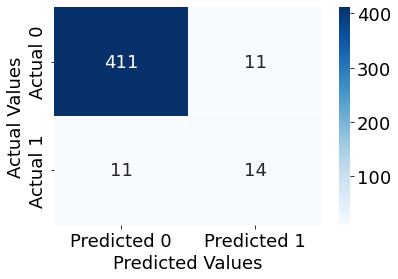

In [79]:
confusion_matrix_year(logit_model_including_all, test_2023, true_2023_as_count)

Classification accuracy = 98.3%
Precision = 83.3%
TPR or Recall = 83.3%
FNR = 16.7%
FPR = 0.9%
ROC-AUC = 91.2%


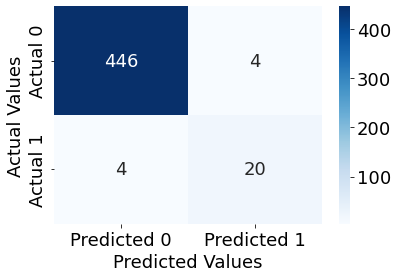

In [80]:
confusion_matrix_year(logit_model_including_all, test_2020, true_2020_as_count)

Classification accuracy = 97.2%
Precision = 76.0%
TPR or Recall = 76.0%
FNR = 24.0%
FPR = 1.5%
ROC-AUC = 87.3%


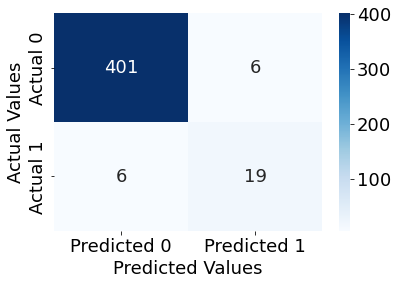

In [81]:
confusion_matrix_year(logit_model_including_all, test_2017, true_2017_as_count)

Classification accuracy = 95.4%
Precision = 64.0%
TPR or Recall = 64.0%
FNR = 36.0%
FPR = 2.5%
ROC-AUC = 80.8%


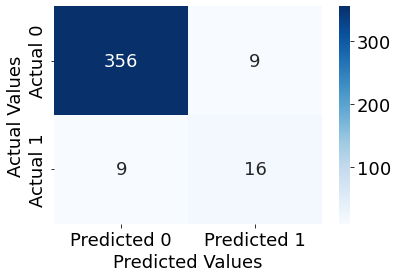

In [82]:
confusion_matrix_year(logit_model_including_all, test_2014, true_2014_as_count)

Classification accuracy = 97.2%
Precision = 78.3%
TPR or Recall = 78.3%
FNR = 21.7%
FPR = 1.5%
ROC-AUC = 88.4%


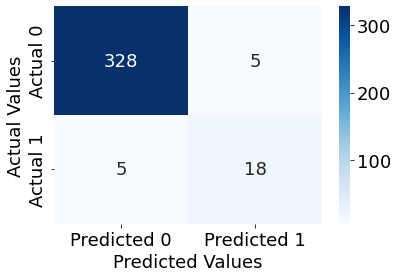

In [83]:
confusion_matrix_year(logit_model_including_all, test_2011, true_2011_as_count)

Classification accuracy

In [84]:
#Function to compute confusion matrix and prediction accuracy on training data

def confusion_matrix_train(model,cutoff=CUTOFF):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    print(cm_df)
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    


Train

        0     1
0  1945.0  32.0
1    32.0  90.0
Classification accuracy = 97.0%


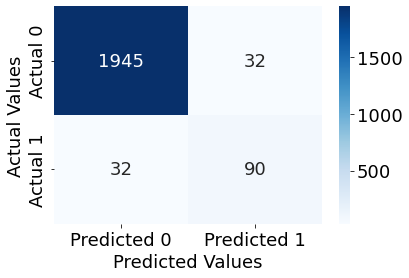

In [85]:
cm_train = confusion_matrix_train(logit_model_including_all)

The prediction accuracy was found to be 96.7% for train data.

In [86]:
#Function to compute confusion matrix and prediction accuracy on test data

def confusion_matrix_test(data,actual_values,model,cutoff=CUTOFF):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))


Test

Classification accuracy = 96.1%


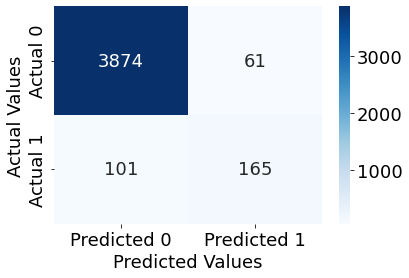

In [87]:
confusion_matrix_test(test_data,test_data.AS,logit_model_including_all)

The prediction accuracy was found to be 95.0% for test data.

Recall

What is the minimum Recall of the model among the Recall performance on train data and test data? Consider a decision threshold probability of 30% when classifying observations.

Here, Recall is the proportion of players predicted to take part in the all star team among those who actually turn out to become all stars.

Recall: Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

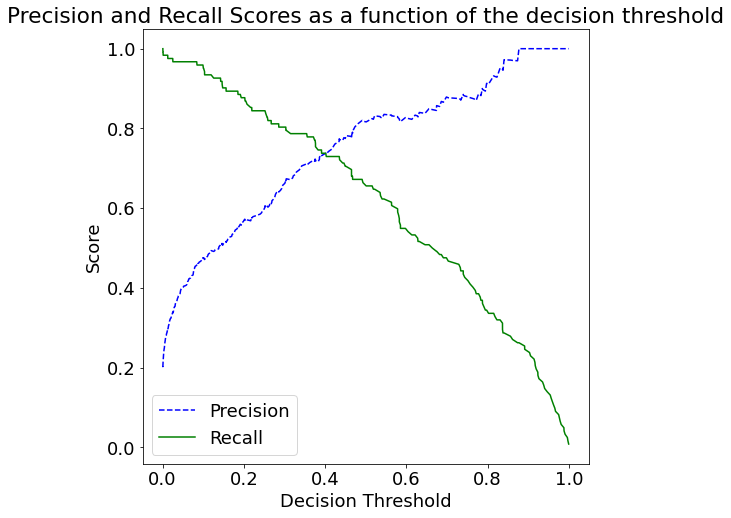

In [88]:

y = train_data.AS
ypred = logit_model_including_all.predict(train_data)
p, r, thresholds = precision_recall_curve(y, ypred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()

plot_precision_recall_vs_threshold(p, r, thresholds)

AUC:  0.9821969037372407


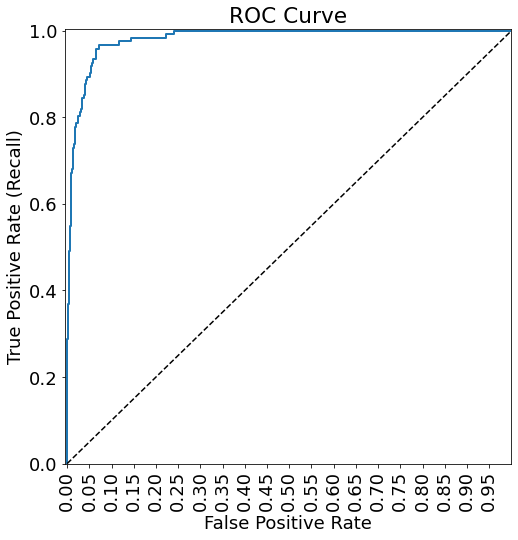

In [89]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    #plt.plot(fpr[np.argmax(net_profit_array_notperperson)+1],tpr[np.argmax(net_profit_array_notperperson)+1], marker="o")
    plt.plot([0, 1], [0, 1], 'k--')   
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print("AUC: ", auc(fpr, tpr))# AUC of ROC

plot_roc_curve(fpr, tpr)

In [90]:
#Function to compute confusion matrix and prediction accuracy on test/train data

def confusion_matrix_data(data,actual_values,model,cutoff=CUTOFF):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Train

Classification accuracy = 97.0%
Precision = 73.8%
TPR or Recall = 73.8%
FNR = 26.2%
FPR = 1.6%
ROC-AUC = 98.2%


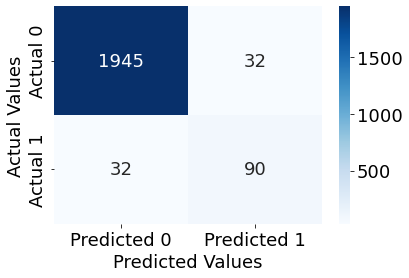

In [91]:
confusion_matrix_data(train_data,train_data.AS,logit_model_including_all,CUTOFF)

Test

Classification accuracy = 96.1%
Precision = 73.0%
TPR or Recall = 62.0%
FNR = 38.0%
FPR = 1.6%
ROC-AUC = 97.8%


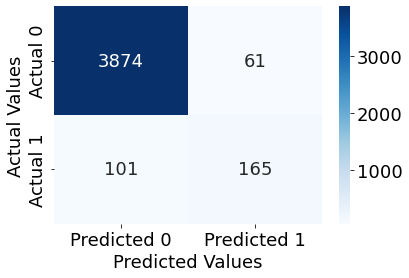

In [92]:
confusion_matrix_data(test_data,test_data.AS,logit_model_including_all,CUTOFF)

Model Improvement (Variable Selection Methods to increase interpretability) 

In [93]:
predictors

,Age,Pos,Tm,G,GS,MP,FG,FGA,FGP,three_P,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,SG,30,30,0,9.7,1.6,3.6,0.444,1.3,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,24,C,22,22,0,7.4,0.8,1.9,0.405,0.2,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,PG,50,50,0,15.9,2.3,6.4,0.356,0.8,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,SG,28,28,0,3.5,0.7,1.6,0.413,0.2,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,SF,59,59,11,19.8,3.5,7.5,0.472,1.4,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,20,SF,7,7,0,4.6,0.4,1.6,0.273,0.0,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1
6292,21,SF,32,32,3,15.7,2.1,5.1,0.411,0.6,...,0.765,0.4,1.8,2.2,0.8,0.4,0.2,0.9,1.7,5.2
6293,19,PF,24,24,24,27.8,8.8,15.0,0.583,0.3,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6295,22,PF,29,29,29,33.0,9.8,16.2,0.608,0.2,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0


In [94]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_predictors = predictors.select_dtypes(include=numerics)
numeric_predictors

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,30,30,0,9.7,1.6,3.6,0.444,1.3,3.0,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,24,22,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,50,50,0,15.9,2.3,6.4,0.356,0.8,3.0,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,28,28,0,3.5,0.7,1.6,0.413,0.2,0.8,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,59,59,11,19.8,3.5,7.5,0.472,1.4,3.7,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,20,7,7,0,4.6,0.4,1.6,0.273,0.0,0.4,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1
6292,21,32,32,3,15.7,2.1,5.1,0.411,0.6,2.6,...,0.765,0.4,1.8,2.2,0.8,0.4,0.2,0.9,1.7,5.2
6293,19,24,24,24,27.8,8.8,15.0,0.583,0.3,0.6,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6295,22,29,29,29,33.0,9.8,16.2,0.608,0.2,0.7,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numeric_predictors = add_constant(numeric_predictors)
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_predictors.columns

for i in range(len(numeric_predictors.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(numeric_predictors.values, i)
sorted_vif = vif_data.sort_values(by="VIF", ascending=False)
print(sorted_vif)

sorted_vif[sorted_vif["VIF"] > 10]

     feature          VIF
7        FGA  9742.330968
27       PTS  7622.005193
13    two_PA  6005.871596
6         FG  5217.860026
21       TRB  2677.318519
12     two_P  1972.816850
10  three_PA  1911.777348
20       DRB  1475.669777
9    three_P   528.735765
16        FT   485.581277
19       ORB   273.911444
0      const   194.012921
17       FTA    79.254538
8        FGP    22.721882
3          G    20.226508
15      eFGP    18.247970
2         Tm    13.774307
5         MP    11.448706
25       TOV     8.419602
14    two_PP     5.193705
22       AST     4.753050
4         GS     3.276990
26        PF     2.822897
23       STL     2.372294
24       BLK     2.280813
11  three_PP     2.021614
18       FTP     1.868164
1        Age     1.095331


,feature,VIF
7,FGA,9742.330968
27,PTS,7622.005193
13,two_PA,6005.871596
6,FG,5217.860026
21,TRB,2677.318519
12,two_P,1972.816850
10,three_PA,1911.777348
20,DRB,1475.669777
9,three_P,528.735765
16,FT,485.581277


Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.

FGA, PTS, two_PA, FG, TRB, two_P, three_PA, DRB all have VIF values greater than 1000 meaning that these variables are perfectly correlated with each other (perfect multicollinearity). We shouldn't have all of these variables included in the model at the same time. Having them all included in the model won't increase accuracy by much and in fact decrease interpretability and lead to incorrect inferences of the model.

Using Forward Selection

In [96]:
X = predictors.drop(["Pos"], axis=1)
X

,Age,Tm,G,GS,MP,FG,FGA,FGP,three_P,three_PA,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,23,30,30,0,9.7,1.6,3.6,0.444,1.3,3.0,...,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,1.0,4.6
1,24,22,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,0.450,0.4,1.3,1.6,0.2,0.0,0.6,0.5,1.0,2.2
3,24,50,50,0,15.9,2.3,6.4,0.356,0.8,3.0,...,0.667,0.3,1.1,1.4,2.2,0.6,0.0,1.1,1.2,6.5
6,27,28,28,0,3.5,0.7,1.6,0.413,0.2,0.8,...,0.000,0.0,0.3,0.4,0.5,0.0,0.0,0.3,0.2,1.6
7,19,59,59,11,19.8,3.5,7.5,0.472,1.4,3.7,...,0.875,0.4,1.6,2.0,1.0,0.7,0.1,0.6,1.2,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6289,20,7,7,0,4.6,0.4,1.6,0.273,0.0,0.4,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1
6292,21,32,32,3,15.7,2.1,5.1,0.411,0.6,2.6,...,0.765,0.4,1.8,2.2,0.8,0.4,0.2,0.9,1.7,5.2
6293,19,24,24,24,27.8,8.8,15.0,0.583,0.3,0.6,...,0.640,2.7,3.6,6.3,2.1,0.7,0.4,2.5,1.8,22.5
6295,22,29,29,29,33.0,9.8,16.2,0.608,0.2,0.7,...,0.714,2.0,5.0,7.0,4.6,1.1,0.6,3.4,2.2,26.0


In [97]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('AS~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [98]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [99]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
# models_best = pd.DataFrame(columns=["Rsquared", "model"])

# tic = time.time()
# for i in range(1,1+X.shape[1]):
#     models_best.loc[i] = getBest_model(i)

# toc = time.time()
# print("Total elapsed time:", (toc-tic), "seconds.")

In [100]:
def best_sub_plots(models_best):
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')
    print("RSADJ.ARGMIN + 1, RSADJ.MIN: ", 1+rsquared_adj.argmax(), rsquared_adj.max() )

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')
    print("AIC.ARGMIN + 1, AIC.MIN: ", 1+aic.argmin(), aic.min() )

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    print("BIC.ARGMIN + 1, BIC.MIN: ", 1+bic.argmin(), bic.min() )
# best_sub_plots()

In [101]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [102]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [103]:
models_best_fw = forward_selection()

Processed  27 models on 1 predictors in 0.07848882675170898 seconds.
Processed  26 models on 2 predictors in 0.0885009765625 seconds.
Processed  25 models on 3 predictors in 0.10250306129455566 seconds.
Processed  24 models on 4 predictors in 0.12300348281860352 seconds.
Processed  23 models on 5 predictors in 0.13150334358215332 seconds.
Processed  22 models on 6 predictors in 0.14649653434753418 seconds.
Processed  21 models on 7 predictors in 0.15494894981384277 seconds.
Processed  20 models on 8 predictors in 0.16049933433532715 seconds.
Processed  19 models on 9 predictors in 0.17350411415100098 seconds.
Processed  18 models on 10 predictors in 0.17449522018432617 seconds.
Processed  17 models on 11 predictors in 0.271970272064209 seconds.
Processed  16 models on 12 predictors in 0.18199658393859863 seconds.
Processed  15 models on 13 predictors in 0.18944787979125977 seconds.
Processed  14 models on 14 predictors in 0.18599915504455566 seconds.
Processed  13 models on 15 predicto

the lower the AIC/BIC value, the better fitting model

RSADJ.ARGMIN + 1, RSADJ.MIN:  22 0.4053803497295446
AIC.ARGMIN + 1, AIC.MIN:  18 -1208.874303562
BIC.ARGMIN + 1, BIC.MIN:  9 -1129.2547164249506


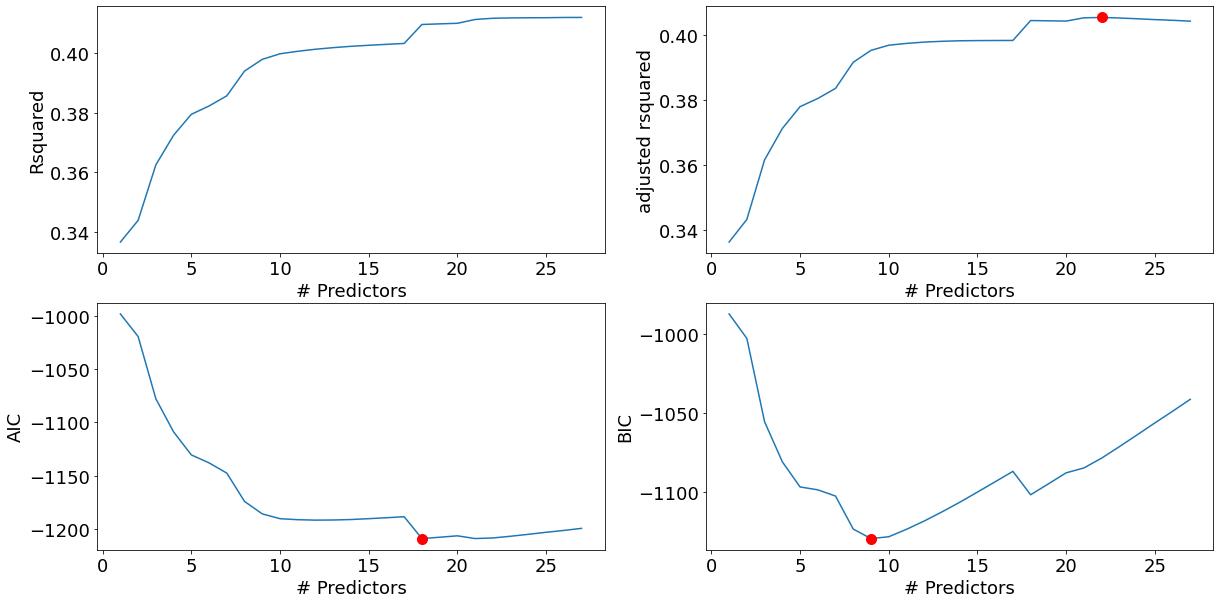

In [104]:
best_sub_plots(models_best_fw)

The model with 9 predictors is the best model based on the AIC criterion, and very close to the best model based on the BIC and adjusted R-squared criteria. Let us select the model with 9 predictors.

In [105]:
best_fwd_reg_model = models_best_fw['model'][9]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     153.4
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          1.02e-222
Time:                        23:23:14   Log-Likelihood:                 602.87
No. Observations:                2099   AIC:                            -1186.
Df Residuals:                    2089   BIC:                            -1129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1073      0.036      2.950      0.003       0.036       0.179
FT             0.0798      0.005     15.213      0.000       0.069       0.090
PF            -0.0440      0.008     -5.409      0.000      -0.060      -0.028
DRB            0.0376      0.005      7.922      0.000       0.028       0.047
AST            0.0195      0.003      6.378      0.000       0.014       0.026
MP            -0.0011      0.000     -3.793      0.000      -0.002      -0.001
ORB           -0.0475      0.010     -4.978      0.000      -0.066      -0.029
FGA           -0.0503      0.007     -7.084      0.000      -0.064      -0.036
FG             0.1004      0.016      6.407      0.000       0.070       0.131
FGP           -0.3063      0.083     -3.691      0.000      -0.469      -0.144
==============================================================================
Omnibus:                      876.504   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6263.502
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                      10.653   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# confusion_matrix_data(train_data,train_data.AS,best_fwd_reg_model,CUTOFF)

In [107]:
# confusion_matrix_data(test_data,test_data.AS,best_fwd_reg_model,CUTOFF)

Classification accuracy = 94.6%
Precision = 52.0%
TPR or Recall = 52.0%
FNR = 48.0%
FPR = 2.8%
ROC-AUC = 74.6%


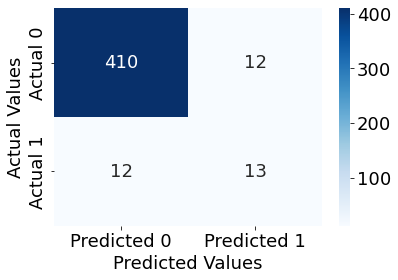

In [108]:
confusion_matrix_year(best_fwd_reg_model, test_2023, true_2023_as_count)

In [109]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [110]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [111]:
models_best_bw = backward_selection()

Processed  27 models on 26 predictors in 0.6459989547729492 seconds.
Processed  26 models on 25 predictors in 0.6424994468688965 seconds.
Processed  25 models on 24 predictors in 0.5199956893920898 seconds.
Processed  24 models on 23 predictors in 0.48200249671936035 seconds.
Processed  23 models on 22 predictors in 0.45999693870544434 seconds.
Processed  22 models on 21 predictors in 0.40599727630615234 seconds.
Processed  21 models on 20 predictors in 0.3549966812133789 seconds.
Processed  20 models on 19 predictors in 0.33299899101257324 seconds.
Processed  19 models on 18 predictors in 0.3000009059906006 seconds.
Processed  18 models on 17 predictors in 0.2649998664855957 seconds.
Processed  17 models on 16 predictors in 0.23599457740783691 seconds.
Processed  16 models on 15 predictors in 0.21450352668762207 seconds.
Processed  15 models on 14 predictors in 0.1829986572265625 seconds.
Processed  14 models on 13 predictors in 0.16299915313720703 seconds.
Processed  13 models on 12 

RSADJ.ARGMIN + 1, RSADJ.MIN:  20 0.40572331137170436
AIC.ARGMIN + 1, AIC.MIN:  19 -1211.626158672474
BIC.ARGMIN + 1, BIC.MIN:  14 -1119.0361630606876


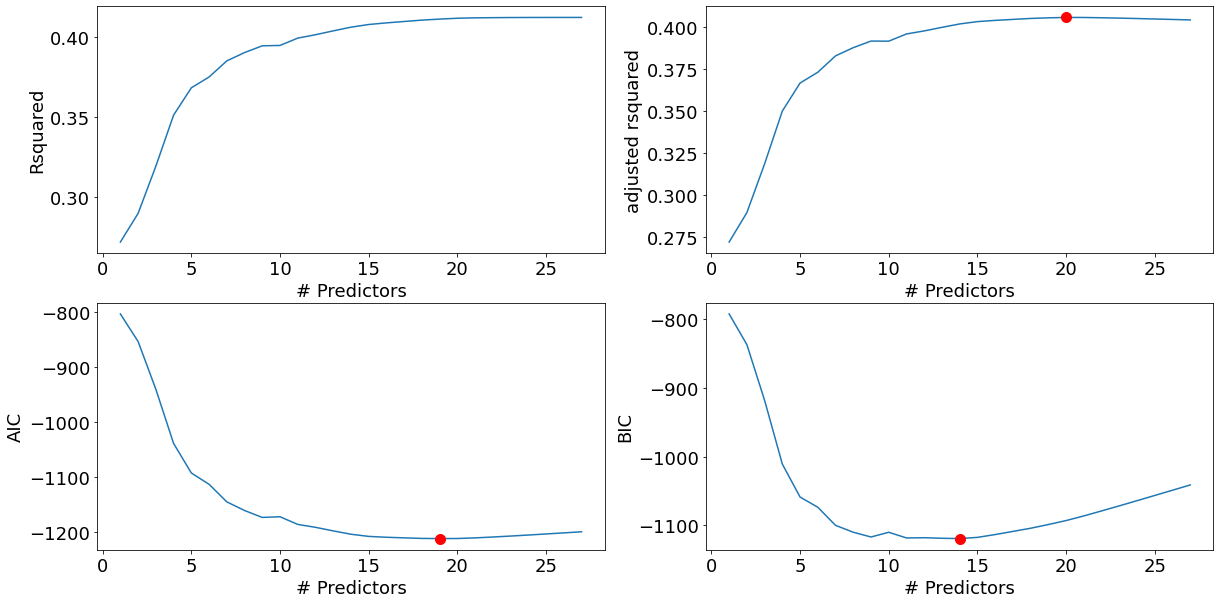

In [112]:
best_sub_plots(models_best_bw)

In [113]:
best_bwd_reg_model = models_best_bw['model'][19]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AS   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     76.31
Date:                Mon, 06 Mar 2023   Prob (F-statistic):          2.78e-222
Time:                        23:23:20   Log-Likelihood:                 625.81
No. Observations:                2099   AIC:                            -1212.
Df Residuals:                    2079   BIC:                            -1099.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1510      0.055      2.767      0.006       0.044       0.258
Age            0.0014      0.001      1.499      0.134      -0.000       0.003
Tm            -0.0031      0.001     -4.727      0.000      -0.004      -0.002
G              0.0028      0.001      4.651      0.000       0.002       0.004
GS             0.0006      0.000      2.658      0.008       0.000       0.001
MP            -0.0048      0.001     -5.974      0.000      -0.006      -0.003
FGP           -0.5845      0.197     -2.963      0.003      -0.971      -0.198
three_P       -0.2600      0.069     -3.790      0.000      -0.394      -0.125
three_PA      -0.0435      0.013     -3.331      0.001      -0.069      -0.018
two_P         -0.1310      0.042     -3.103      0.002      -0.214      -0.048
two_PA        -0.0467      0.008     -5.505      0.000      -0.063      -0.030
eFGP           0.3163      0.188      1.683      0.092      -0.052       0.685
FTA           -0.0285      0.017     -1.716      0.086      -0.061       0.004
FTP           -0.1209      0.039     -3.078      0.002      -0.198      -0.044
ORB           -0.0425      0.011     -4.009      0.000      -0.063      -0.022
DRB            0.0366      0.005      7.420      0.000       0.027       0.046
AST            0.0183      0.003      5.369      0.000       0.012       0.025
STL            0.0299      0.015      2.008      0.045       0.001       0.059
PF            -0.0382      0.009     -4.467      0.000      -0.055      -0.021
PTS            0.1158      0.020      5.743      0.000       0.076       0.155
==============================================================================
Omnibus:                      854.588   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6310.650
Skew:                           1.740   Prob(JB):                         0.00
Kurtosis:                      10.749   Cond. No.                     6.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 93.0%
Precision = 68.8%
TPR or Recall = 55.0%
FNR = 45.0%
FPR = 2.8%
ROC-AUC = 96.6%


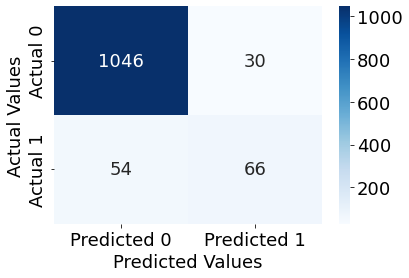

In [114]:
confusion_matrix_data(train_data,train_data.AS,best_bwd_reg_model,CUTOFF)

Classification accuracy = 92.9%
Precision = 85.1%
TPR or Recall = 45.3%
FNR = 54.7%
FPR = 1.0%
ROC-AUC = 97.0%


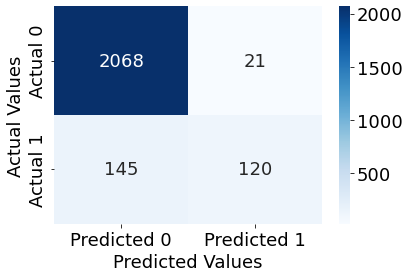

In [115]:
confusion_matrix_data(test_data,test_data.AS,best_bwd_reg_model,CUTOFF)

Classification accuracy = 95.1%
Precision = 56.0%
TPR or Recall = 56.0%
FNR = 44.0%
FPR = 2.6%
ROC-AUC = 76.7%


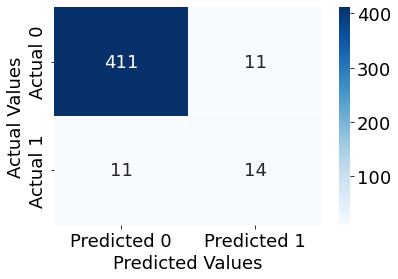

In [116]:
confusion_matrix_year(best_bwd_reg_model, test_2023, true_2023_as_count)

In [117]:
#Create 2*2 Subplot for all_var, forward_one, forward_two, backward



In [118]:
sorted_vif[sorted_vif["VIF"] > 10]

,feature,VIF
7,FGA,9742.330968
27,PTS,7622.005193
13,two_PA,6005.871596
6,FG,5217.860026
21,TRB,2677.318519
12,two_P,1972.816850
10,three_PA,1911.777348
20,DRB,1475.669777
9,three_P,528.735765
16,FT,485.581277


in case of determining players that make it to the all stars, false negatives are more concerning than false positives. This is because if a person has diabetes, and is told that they do not have diabetes, their condition may deteriorate. If a person does not have diabetes, and is told that they have diabetes, they may take unnecessary precautions or tests, but it will not be as harmful to the person as in the previous case. So, in this problem, we will be more focused on reducing the number of false negatives, instead of reducing the false positives or increasing the overall classification accuracy.

We can decrease the cutoff for classifying a person as having diabetes to reduce the number of false negatives.

Note that the changed cut-off reduced the number of false negatives, but at the cost of increasing the false positives. However, the stakeholders may prefer the reduced cut-off to be safer.

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc




def confusion_matrix_multi(model_list, label_list, test_ds, as_count):
    fig, axs = plt.subplots(2, 2, figsize=(24, 20))
    plt.subplots_adjust(hspace  = 0.6)
    axs = axs.ravel()
    
    for i, model in enumerate(model_list):
        # Assume new_data is a dataframe containing the predictor variables for the new observations
        pred_probs = model.predict(test_ds)  # Predict the probabilities of AS=1 for each observation
        pred_probs_sorted = pred_probs.sort_values(ascending=False)  # Sort the probabilities in descending order
        top_indices = pred_probs_sorted.head(as_count).index  # Get the indices of the top n observations with the highest probabilities
        predicted_classes = pd.Series(0, index=test_ds.index)  # Create a Series to store the predicted classes (0 or 1) for each observation
        predicted_classes.loc[top_indices] = 1  # Set the top n predicted classes to 1, and the rest to 0
        true_values = test_ds['AS']
        confusion = pd.DataFrame(confusion_matrix(true_values, predicted_classes))
        confusion.columns = ['Predicted 0', 'Predicted 1']
        confusion = confusion.rename(index={0: 'Actual 0',1: 'Actual 1'})
        cm = np.array(confusion)
        # Calculate the performance metrics
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
        precision = (cm[1,1])/(cm[0,1]+cm[1,1])
        fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
        tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
        fpr_roc, tpr_roc, auc_thresholds = roc_curve(true_values, predicted_classes)
        auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
        # Create the heatmap of the confusion matrix
        sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g', ax=axs[i])
        axs[i].set_ylabel("Actual Values")
        axs[i].set_xlabel("Predicted Values")
        axs[i].set_title(label_list[i])
        # Print the performance metrics
        axs[i].text(0, 1.35, "Classification accuracy = {:.1%}".format(accuracy), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.3, "Precision = {:.1%}".format(precision), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.25, "TPR or Recall = {:.1%}".format(tpr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.2, "FNR = {:.1%}".format(fnr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.15, "FPR = {:.1%}".format(fpr), horizontalalignment='left', transform=axs[i].transAxes)
        axs[i].text(0, 1.1, "ROC-AUC = {:.1%}".format(auc_value), horizontalalignment='left', transform=axs[i].transAxes)


In [60]:
model_list = [logit_model_including_all, logit_model_less_corr, best_fwd_reg_model, best_bwd_reg_model]
label_list = ["All Vars (27)", "Corr Removed (14)", "best_fwd_reg_model (9)", "best_bwd_reg_model (19)"]
confusion_matrix_multi(model_list, label_list, test_2023, true_2023_as_count)

NameError: name 'best_fwd_reg_model_one' is not defined

In [ ]:
confusion_matrix_multi(model_list, label_list, test_2020, true_2020_as_count)

In [ ]:
confusion_matrix_multi(model_list, label_list, test_2017, true_2017_as_count)

In [ ]:
confusion_matrix_multi(model_list, label_list, test_2014, true_2014_as_count)

In [ ]:
confusion_matrix_multi(model_list, label_list, test_2011, true_2011_as_count)